# Data Preparation and EDA in Python: Car Data

Whenever you are working with real-world data, data preparation is the first step.
It is typically interleaved with exploratory data analysis (EDA). The two activities require and foster understanding of the data (including the measurement process) as well as the objects under study. This is an essiential basis for any data-driven hypotheses and models.

We will learn about explorative data analysis using the example of car data. We want to find out whether we can identify relationships between the attributes of cars out of the given dataset.

This notebook is adapted from an opensource notebook that is available here: `https://github.com/Tanu-N-Prabhu/Python/blob/master/Exploratory%20Data%20Analysis/%20Exploratory_data_Analysis_1.ipynb.`
The data we will use is taken from `https://www.kaggle.com/CooperUnion/cardataset`.

## Preparation: Importing the required python-libraries 
As we have seen in previous notebooks, libraries contain functionalities that go above the standard python implementation. These can be very useful for our tasks.

`pandas` and `numpy` contain datatypes and data structures that are used often in machine learning tasks, such as e.g. *data frames*. `seaborn` and `matplotlib` are popular libraries used to visualize data. We have used `pandas`, `seaborn`, and `matplotlib` previously and will now learn about some methods contained in `numpy`. 

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns                     
import matplotlib.pyplot as plt 
%matplotlib inline     
sns.set(color_codes=True)

In [155]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, root_mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

## Loading the data
First we start by loading the data. To get an impression of what type of data we are working with, we will look at the first few entries and generate a description of the data set. 

In [157]:
car_df = pd.read_csv('car_data.csv')

Now that we have loaded the dataset, let's print some information about it. 

In [158]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**Exercise**: What do we learn from this result? What do the different datatypes mean (`Dtype`)?

Next, we want to take a look at the actual data, using `df.head(5)`, and `df.tail(5)` that you have used before, we will get the first, and the last 5 rows. 

In [159]:
# printing the first 5 rows
car_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [160]:
# printing the last 5 rows
car_df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## Removing unnecessary data
We won't need all attributes in the data analysis. Therefore, it makes sense to leave some out in advance. This step makes it easier to get (and keep) an overview of the data.

***Please note***: When working with larger datasets, it is likely that a large number of attributes have to be left out. It might also make sense to only work with a subset of the data. However, it is important not to leave out too much data in advance. As we are working in an explorative manner, we don't know what attributes we might need in later steps. 

In [161]:
#  Let's remove a couple of attributes that don't seem important and print the first and last 5 rows again. 
car_df = car_df.drop(columns=['Market Category', 'Vehicle Style', 'Popularity', 'Vehicle Size'])
car_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,34500


In [162]:
car_df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,highway MPG,city mpg,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,23,16,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,23,16,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,23,16,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,23,16,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,26,17,28995


**Exercise**: What do you notice when looking at the results? 

## Data cleaning
Most real word data has to be cleaned before we can use it for data analysis. For example, some datasets may contain duplicates, as we have just seen in the example above. 

In [163]:
# Let's look at the shape of the dataset.
car_df.shape

(11914, 12)

### Removing duplicates
Duplicates can appear in our data for many reasons, such as measurements that were repeated, or - as in our case - from removing attributes that would have made the data differ. The meaning of duplicates strongly depends on the application, they don't always have to be removed!

**Exercise** Can you think of reasons why duplicate rows in a dataset might be bad for machine learning usecases?

In [164]:
# Here we are creating a new dataframe and printing the number of rows that are duplicated
duplicate_rows_df = car_df[car_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (815, 12)


Since we are interested in the correlation between the single attributes of cars, we don't need duplicates. Therefore, we want to remove them using the `drop_duplicates()` method. Note how the shape of the car dataframe changed compared to before. 

In [165]:
car_df = car_df.drop_duplicates()

In [166]:
car_df.shape

(11099, 12)

### Transformating values
In the USA, the consumption of cars is measured in MPG (Miles per Gallon). In Switzerland however, we usually measure the amount of gas consumed per 100 km. Therefore, we want to change the data we received, to reflect swiss standards. As in the provided dataset, we want to separate the consumption on highways from the consumption in cities. 
For this purpose, we will define a **function** `mpg_to_lpro100km`: 

In [167]:
def mpg_to_lpro100km(mpg):
    # converts miles per gallon to liters per 100 km
    return (100 * 3.785411784) / (mpg * 1.609344)

Now we will apply this function to both attributes (`highway MPG` and `city mpg`):

In [168]:
car_df['consumption_city'] = mpg_to_lpro100km(car_df['city mpg'])

**Exercise**: Change the above line to also transform the attribute `highway MPG` into swiss standards. Save your result in a new attribute called `consumption_highway`.

Both of these lines of code don't produce an output. Instead, the result is saved in a new column in a dataframe. Therefore, our `car_df` dataframe now has two new columns: 

In [169]:
car_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,highway MPG,city mpg,MSRP,consumption_city
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,26,19,46135,12.379715
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,28,19,40650,12.379715
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,28,20,36350,11.760729
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,29450,13.067477
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,34500,13.067477


**Exercise**: write code to remove the columns containing the MPG. 

### Renaming of Columns 
As a last preparation step, we want to change the names of some of the attributes. The names are too long and we would like them to be more concise. We use the function `rename` to do so - it takes as argument `columns` a dictionary of the form `{<old_name1>: <new_name1>, <old_name2>: <new_name2>, ...}`:

In [170]:
car_df = car_df.rename(columns={'Make': 'Brand',
                                'Engine Fuel Type': 'F_type',
                                'Engine HP': 'HP',
                                'Engine Cylinders': 'Cylinder',
                                'Driven_Wheels': 'Wheels',
                                'Number of Doors': 'Doors',
                                'Transmission Type': 'T_type',
                                'MSRP': 'Price'
                               })

### Converting Non-Numerical Attributes
We also notice, that the dataset contains values that are not numerical. If we want to work with these attributes, we need to convert these non numerical values into numerical values.
To do this, we create "dummy"-values to represent the different types of values. 
Let's do this for the attribute `F_type`: 

In [171]:
# Let's first look at the different types of fuel our cars use: 
values = car_df['F_type'].unique()
print(values)

['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'electric' 'flex-fuel (premium unleaded recommended/E85)' 'natural gas'
 'flex-fuel (premium unleaded required/E85)'
 'flex-fuel (unleaded/natural gas)' nan]


As we can see, we have 10 different types of fuel (excluding nan, which we will look at in more detail later). 
We will now use the function .get_dummies() to get dummy values that help us distinguish the different types of fuel.  

In [172]:
fuel_dummies = pd.get_dummies(car_df, columns=['F_type'])
 
# Let's take a look at what this new dataframe looks like: 

print(fuel_dummies.count())
fuel_dummies.head()

Brand                                                  11099
Model                                                  11099
Year                                                   11099
HP                                                     11030
Cylinder                                               11069
T_type                                                 11099
Wheels                                                 11099
Doors                                                  11093
highway MPG                                            11099
city mpg                                               11099
Price                                                  11099
consumption_city                                       11099
F_type_diesel                                          11099
F_type_electric                                        11099
F_type_flex-fuel (premium unleaded recommended/E85)    11099
F_type_flex-fuel (premium unleaded required/E85)       11099
F_type_flex-fuel (unlead

,Brand,Model,Year,HP,Cylinder,T_type,Wheels,Doors,highway MPG,city mpg,...,F_type_diesel,F_type_electric,F_type_flex-fuel (premium unleaded recommended/E85),F_type_flex-fuel (premium unleaded required/E85),F_type_flex-fuel (unleaded/E85),F_type_flex-fuel (unleaded/natural gas),F_type_natural gas,F_type_premium unleaded (recommended),F_type_premium unleaded (required),F_type_regular unleaded
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,26,19,...,False,False,False,False,False,False,False,False,True,False
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,28,19,...,False,False,False,False,False,False,False,False,True,False
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,28,20,...,False,False,False,False,False,False,False,False,True,False
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,...,False,False,False,False,False,False,False,False,True,False
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,...,False,False,False,False,False,False,False,False,True,False


**Exercise**
What can we learn about how this method distinguishes the different types of fuel, by looking at the printed new dataframe `fuel_dummies` above?

**Exercise**
Inspect the other datatypes and transform the attributes that are not numerical, such that there are only numerical values left. The last lines of code transform boolean values to numerical values.

In [173]:
brand_dummies = pd.get_dummies(fuel_dummies, columns=['Brand'])
model_dummies = pd.get_dummies(brand_dummies, columns=['Model'])
t_type_dummies = pd.get_dummies(model_dummies, columns=['T_type'])


wheels_dummies = pd.get_dummies(t_type_dummies, columns=['Wheels'])
wheels_dummies
# for the Boolean values to be transformed to numerical values, we use the method .astype(int) 
all_dummies = wheels_dummies.dropna()
all_dummies.astype(int,errors='ignore')
all_dummies.head()

,Year,HP,Cylinder,Doors,highway MPG,city mpg,Price,consumption_city,F_type_diesel,F_type_electric,...,Model_xD,T_type_AUTOMATED_MANUAL,T_type_AUTOMATIC,T_type_DIRECT_DRIVE,T_type_MANUAL,T_type_UNKNOWN,Wheels_all wheel drive,Wheels_four wheel drive,Wheels_front wheel drive,Wheels_rear wheel drive
0,2011,335.0,6.0,2.0,26,19,46135,12.379715,False,False,...,False,False,False,False,True,False,False,False,False,True
1,2011,300.0,6.0,2.0,28,19,40650,12.379715,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2011,300.0,6.0,2.0,28,20,36350,11.760729,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2011,230.0,6.0,2.0,28,18,29450,13.067477,False,False,...,False,False,False,False,True,False,False,False,False,True
4,2011,230.0,6.0,2.0,28,18,34500,13.067477,False,False,...,False,False,False,False,True,False,False,False,False,True


We can stick to the original dataframe `car_df` for the rest of the evaluation, but we will need the dataframe `all_dummies`for training later. 

## Taking a look at the data
So far we have worked on entire rows or columns of the dataset. Now we want to check out the values of single attributes (or columns) in more detail. 

### How many records contain values?
First, let's check how many of the records contain data. 

In [174]:
car_df.count()

Brand               11099
Model               11099
Year                11099
F_type              11096
HP                  11030
Cylinder            11069
T_type              11099
Wheels              11099
Doors               11093
highway MPG         11099
city mpg            11099
Price               11099
consumption_city    11099
dtype: int64

In [175]:
car_df.shape

(11099, 13)

After cleaning the data we have 11099 rows left. The attributes `Brand`, `Model`, `Year` are present in every row. However, three cars have no information about the `F_type`, and 68 cars are missing entries on the horse power (`HP`). Furthermore, 30 cars are missing information about the cylinders.  

**Exercise**: Do you think there might be a reason why some rows lack data about certain attributes? 
*Domain knowledge*, in this case about cars, is very important to formulate hypotheses in practice. These can then be verified using the data.


Missing values are handled in a special way in most programming languages. In Python, numerical values that are missing are denoted by `NaN` (`np.NaN`), which stands for *Not a Number*. Using the method `car_df.count()` we count the rows for each column, only if there are values in that row. The rows for which the `F_type` value is missing are left out of this count. We can identify these empty entries using the `pd.isna(...) ` function. It returns a Boolean value (`True` if the value is `NaN`and `False` otherwise) for each entry, which we can use after to make logical indices in the dataframe. 

In [176]:
car_df[pd.isna(car_df['F_type'])]

,Brand,Model,Year,F_type,HP,Cylinder,T_type,Wheels,Doors,highway MPG,city mpg,Price,consumption_city
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,25,17,17199,13.836152
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,25,17,20199,13.836152
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,25,17,18499,13.836152


### How often do different values appear?
Next we want to see how often the different types of fuel are present in the data. We use the `.groupby()` method from `pandas`, which is grouping rows of a dataframe by one or more keys (columns). `car_df.groupby('F_type')` will thus, for every values of `car_df['F_type']`, give us a group with all cars that run on this fuel type. On the resulting groups, we then run `size` to count the elements (i.e., the cars) in each group.

In [177]:
car_df.groupby('F_type').size()
# Since we want to see the amount of cars using the different types of fuel, we use .size().

F_type
diesel                                           150
electric                                          66
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (premium unleaded required/E85)         53
flex-fuel (unleaded/E85)                         887
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
premium unleaded (recommended)                  1391
premium unleaded (required)                     1947
regular unleaded                                6568
dtype: int64

We can also examine the combination of `F_type` and amount of `Cylinder`: 

In [178]:
car_df.groupby(['F_type', 'Cylinder']).size()

F_type                                        Cylinder
diesel                                        4.0           90
                                              5.0            3
                                              6.0           56
                                              10.0           1
electric                                      0.0           56
flex-fuel (premium unleaded recommended/E85)  4.0           17
                                              8.0            9
flex-fuel (premium unleaded required/E85)     6.0           11
                                              8.0           18
                                              12.0          24
flex-fuel (unleaded/E85)                      4.0           98
                                              6.0          413
                                              8.0          376
flex-fuel (unleaded/natural gas)              6.0            6
natural gas                                   4.0            2


**Exercise**: Pay attention to the two outputs concerning electric cars above. What do you notice?

We saw above, that there is something happening with the electric cars, that makes some not be included in the grouped output. So let's look at the list of all electric cars. For the sake of readability, usually only a subset of the rows of data frames are printed in Jupyter Notebooks. The maximal number of printed cells can be controlled through the `display.max_rows` option. 

In [179]:
# Let's look at the current value of max_rows:
pd.get_option('display.max_rows') 

11100

In [180]:
# Since the result is less than the amount of entries we have, 
# let's change the value of max_rows to: 
pd.set_option('display.max_rows', car_df.shape[0]+1) 

In [181]:
car_df.shape[0]

11099

In [182]:
# now, we print all cars from this dataframe that use the electric fuel type
car_df[car_df['F_type']=='electric']

,Brand,Model,Year,F_type,HP,Cylinder,T_type,Wheels,Doors,highway MPG,city mpg,Price,consumption_city
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,108,122,31800,1.927988
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,103,121,31800,1.943922
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,103,121,31800,1.943922
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,82,85,41450,2.767230
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,82,85,41450,2.767230
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,82,85,39900,2.767230
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,110,128,40905,1.837614
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,110,128,36620,1.837614
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,105,126,33450,1.866782
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,105,126,35445,1.866782


**Exercise**: Take a good look at the result above, especially the count of `Cylinder`. Do you find an answer to the question that we had before, about electric cars?

## Outliers
As we saw above, some values can be missing (`NaN`), or a special value can be attributed to them (0 in this case) - 0 cylinders does not make sense for cars with a combustion engine! 

It is also important to identify so called *outliers*. As we have seen in previous notebooks, outliers are values that are unproportionally low or high, compared to the other values in that category, or *special* in some other aspect. For instance in this example, the price and the horse power of sports cars is a lot higher than that of the regular cars. 
Let's take a look at the data: 

### Maximal and Minimal entries

In [183]:
# We use the following method to determine the lowest price of a car in our database. 
np.min(car_df['Price'])

2000

In [184]:
# We use the following method to determine the highest price of a car in our database. 
np.max(car_df['Price'])

2065902

As we can see, we have a huge range of prices in this dataset, from 2000 to over 2 million Dollars! It seems unlikely that the same dependencies (e.g., between price and horse power) are valid across the entire range - we will keep this in mind when building a model.

### Percentiles
Another interesting indicator are the percentiles, that we have also already encountered in previous exercises. The x%-percentile value measures the price that is larger then  x% of the values in our dataset are. For example, let's look at the 50% percentile of the car prices in our dataset:

In [185]:
np.percentile(car_df['Price'], 50)

30850.0

Hence, 50 % (aka. half) of the cars in our dataset cost less than 30850$ and the other half cost more. Here, 50 is called the *percentile rank*, and 30850.0 is the *percentile value*.

Let's compute the values for some more percentiles ranks.  
By passing an array of values to this function, we will get an array of results, i.e., we will get the percentile value of each of these percentile ranks:

In [186]:
np.percentile(car_df['Price'], [ 5, 10, 25, 75, 90, 95 ])

array([  2000. ,   3204.6,  21835. ,  43247.5,  67204. , 113400. ])

These results show: 
* The 25%-Percentile - which is also called **first quartile** - of the car prices is 21'835 USD. This means that the cheapest quarter of cars cost less than 21'835 USD.
* The 75%-Percentile, also called **third quartile** of car prices, is 43'247.50 USD; hence three fourth of the cars in our dataset cost at most that much. 
* The "middle half" of the cars therefore have a price between  21'835USD and 43'247.50 USD.
* The **inter-Quartile-Difference** (IQD) is 43'247.50 USD-21'835 USD = 21'412.5 USD. The IQD is an important measure for the **distribution** in the middle areas.
* At the top the prices appear to diverge: The 95%-Percentile is 113'400 USD. The 5% most expensive cars all cost more than that value. 

***Exercise***: How much do the 1% most expensive cars of our dataset cost? Compute and comment on the results. 

## First visualisations
We now want to generate some plots, in the same way as we have done in previous notebooks: 

### Boxplot
Boxplots allow us to visualize the distribution of the data and some of the statistics that we have calculated above. 
        
***Note***: Boxplots can be parametrised in different ways, especially concering the whiskers.

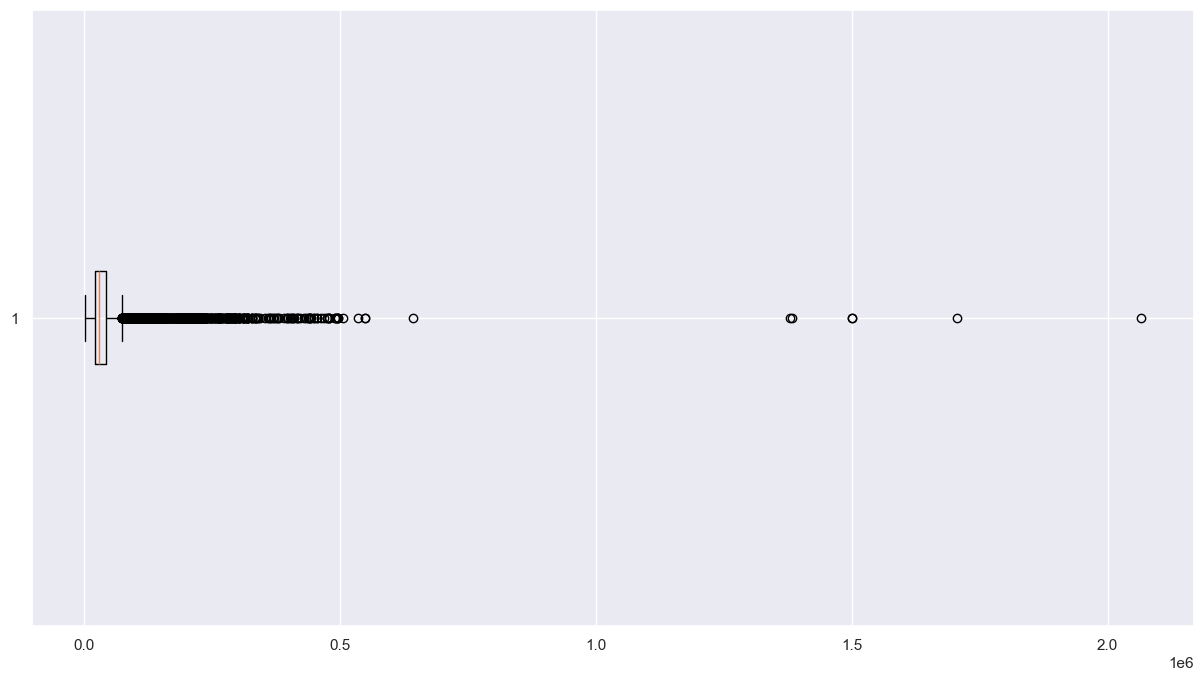

In [187]:
fig, main_ax = plt.subplots(figsize=(15,8))
main_ax.boxplot(car_df['Price'], vert=False)
plt.show()

The outliers, which are the very expensive cars in this case, affect the visualisation: the x-axis is showing all values. Therefore, the price range that is relevant for most people looking to buy a car is squished to a small area.  
Using the method `main_ax.set_xlim(0, 250000)` that we import from the Axis class, we can reduce the price range of the x-axis. Here we reduce it to the range of 0 until 250\'000 USD.

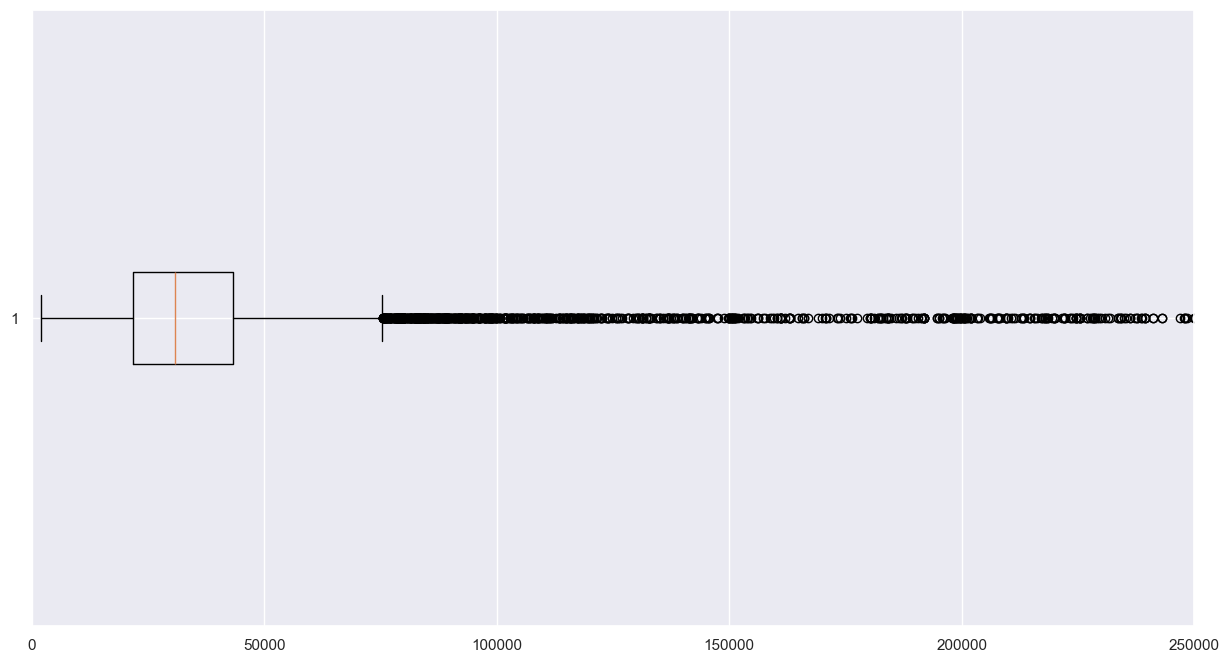

In [188]:
fig, main_ax = plt.subplots(figsize=(15,8))
main_ax.boxplot(car_df['Price'], vert=False)
main_ax.set_xlim(0, 250000)
plt.show()

### Bar Plot
A bar plot is used to visualize how often each unique value in a dataset appears.  

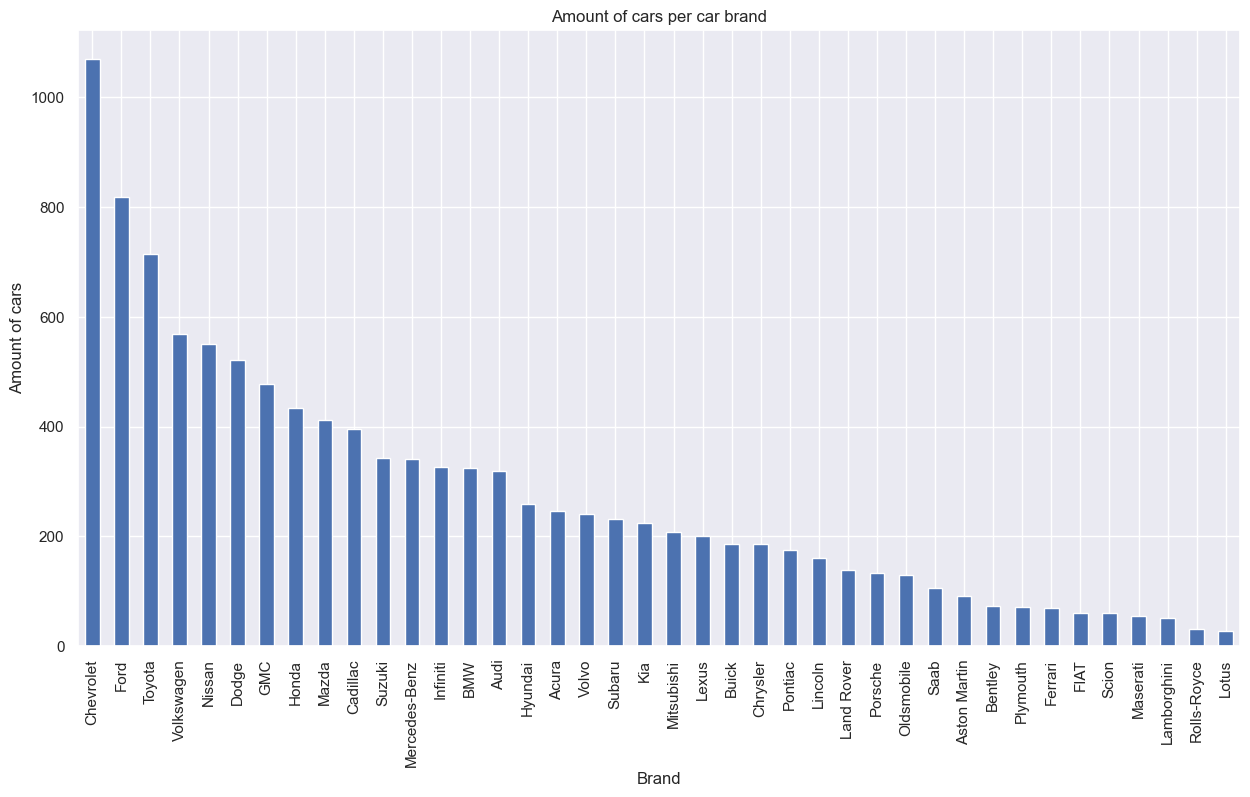

In [189]:
car_df['Brand'].value_counts().nlargest(40).plot(kind='bar', figsize=(15,8))
plt.title('Amount of cars per car brand')
plt.ylabel('Amount of cars')
plt.xlabel('Brand')
plt.show()

### Histogram
A histogram looks very similar to a bar plot, but histograms are based on **continuous** data. These continuous values are divided into intervals when the plot is generated and then the amount of entries per interval is counted and plotted.

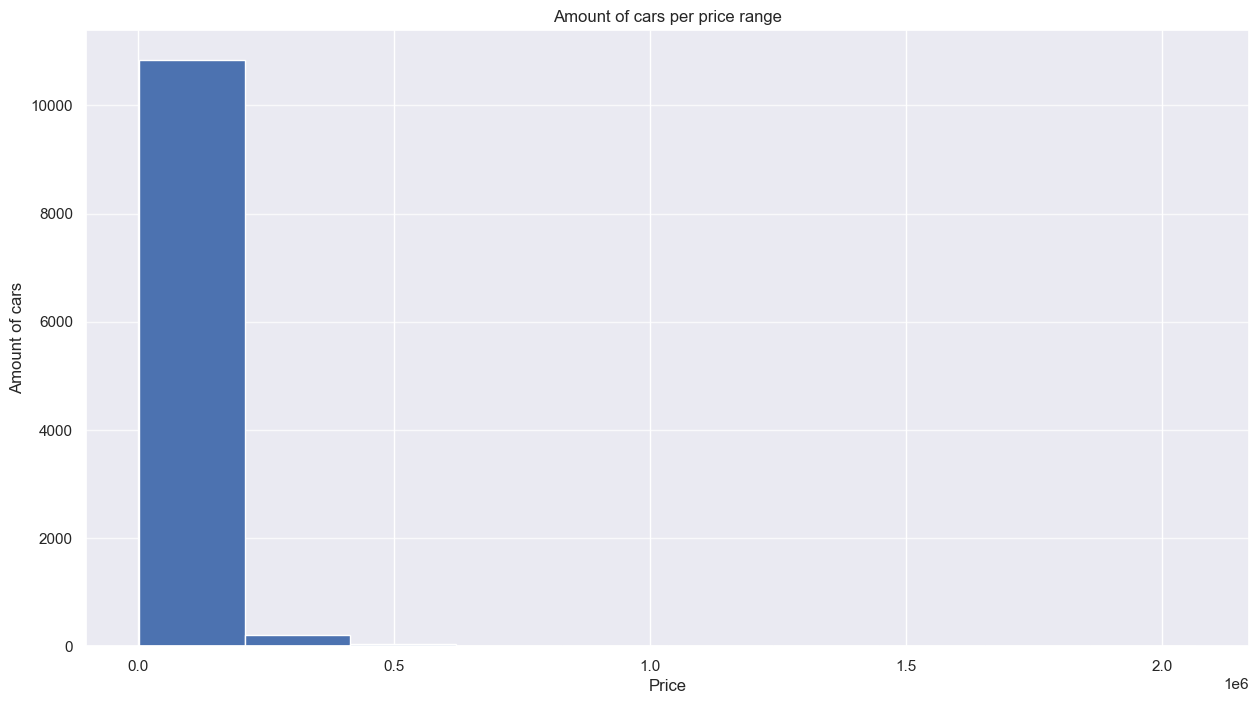

In [190]:
plt.subplots(figsize=(15,8))
plt.hist(x=car_df['Price'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Amount of cars')
plt.title('Amount of cars per price range')
plt.show()

Python, and in this case `matplotlib`, is choosing the x- and the y- axis scale such that all values can be shown. Since our dataset contains a small number of very expensive cars, most other cars end up in the same category, on the left. Therefore, we will generate this plot again and only include cars that have a price below 250\'000 USD. We are also setting `bins` to 25, which means that we want to divide the price range into 25 intervals of equal size.

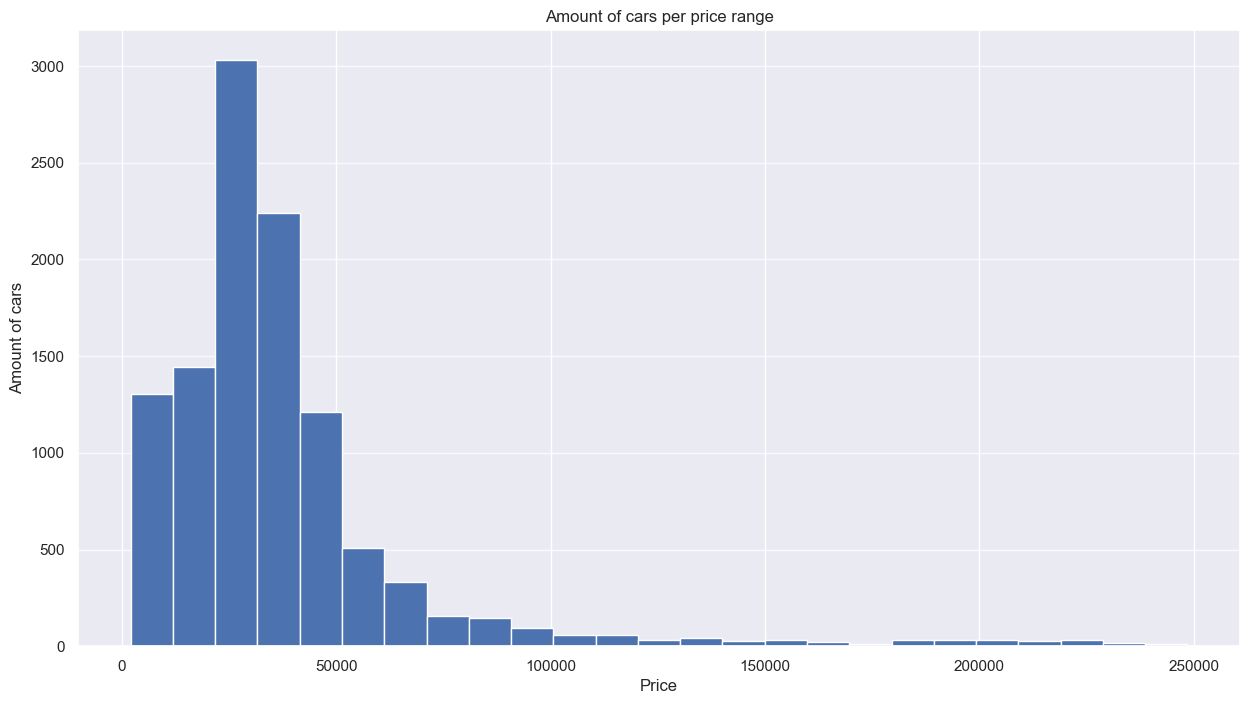

In [191]:
plt.subplots(figsize=(15,8))
plt.hist(x=car_df['Price'][ car_df['Price']<250000 ], bins=25)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Amount of cars')
plt.title('Amount of cars per price range')
plt.show()

### Correlation and Heatmaps
Correlation (which we have already seen in other notebooks) is a statistical measure that quantifies the relationship between variables. Correlation values range between -1 and +1.

* A correlation of +1 between two variables indicates that their values move in the same direction. For example, "The more we have of x, the more we have of y." A real-world example is the relationship between the distance you drive and the amount of gas you consume — the farther you drive, the more gas you use.

* A correlation of -1 between two variables indicates that their values move in opposite directions. For example, "The more we have of x, the less we have of y." A real-world example is the relationship between the distance driven and the amount of gas left in your tank — the farther you drive, the less gas remains (until you refill the tank).

* A correlation of 0 between two variables means they are independent of each other. For instance, the amount of gas your car consumes is not correlated with the length of your hair.

The strength of the correlation (how close the value is to -1 or +1) indicates the magnitude of the relationship.

Let's look at the concrete example of the car dataset. We will use the method `.corr()` to calculate the correlation between the variables. We should first check the different datatypes of the values we are dealing with:

In [192]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11099 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             11099 non-null  object 
 1   Model             11099 non-null  object 
 2   Year              11099 non-null  int64  
 3   F_type            11096 non-null  object 
 4   HP                11030 non-null  float64
 5   Cylinder          11069 non-null  float64
 6   T_type            11099 non-null  object 
 7   Wheels            11099 non-null  object 
 8   Doors             11093 non-null  float64
 9   highway MPG       11099 non-null  int64  
 10  city mpg          11099 non-null  int64  
 11  Price             11099 non-null  int64  
 12  consumption_city  11099 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


In [193]:
# We only want to include the columns that contain numerical values: 
numeric_df = car_df.select_dtypes(include=[float, int])
c = numeric_df.corr()

As we saw in previous exercises, we can visualize the correlation in a heatmap. 

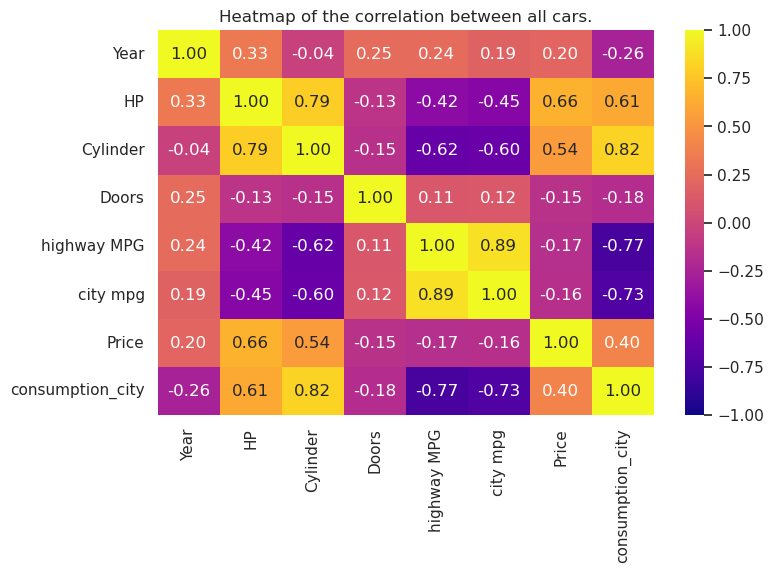

In [194]:
plt.figure(figsize=(8,5))
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.heatmap(c, cmap='plasma', fmt=".2f",vmin=-1, vmax=1, annot=True)
plt.gca().set_title('Heatmap of the correlation between all cars.')
plt.show()

Recall that we looked at outliers earlier - there are some cars, that are extremely expensive. 
But in the evaluation above, we have used all cars. 
Let's repeat this evaluation using only cars that cost less than **50\'000 USD**.

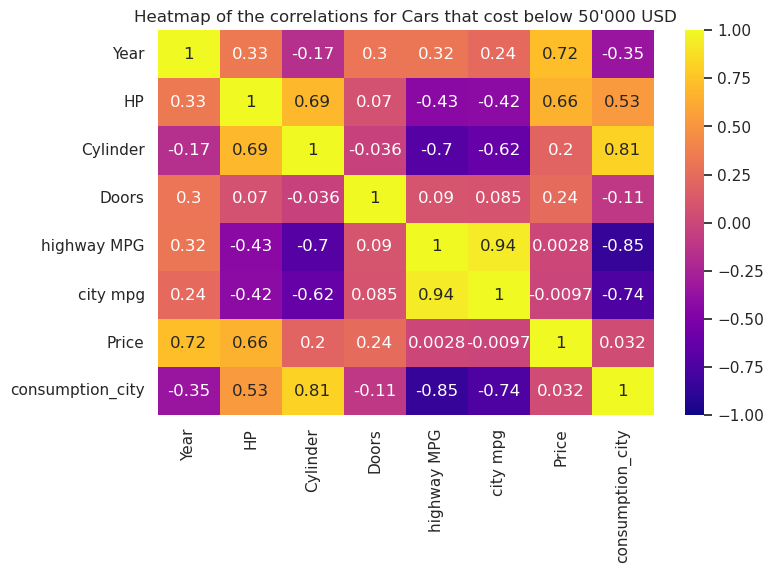

In [195]:
plt.figure(figsize=(8,5))
c_normal = numeric_df[ numeric_df['Price']<50000 ].corr()
sns.heatmap(c_normal, cmap='plasma', vmin=-1, vmax=1, annot=True)
plt.gca().set_title('Heatmap of the correlations for Cars that cost below 50\'000 USD')
plt.show()

**Exercise**: What are the correlations for very expensive cars (Price above 250\'000 USD)? Create a third plot, by adapting the code above. What do you notice? Where are the biggest differences between all three plots?

### Scatterplots
The correlation and the corresponding Heatmap are very useful tools to visualize the entire dataset (that is why this is called *summary statistics*). However, we loose the information about single datapoints, and outliers can have a huge influence on the results of the evaluation. 

When we make scatterplots we choose two attributes, which we use as the values for the x- and y-axis, and represent every single datapoint. This gives us a more detailed view on the data. 
As an example we use the correlation between `HP` and `Price`: 

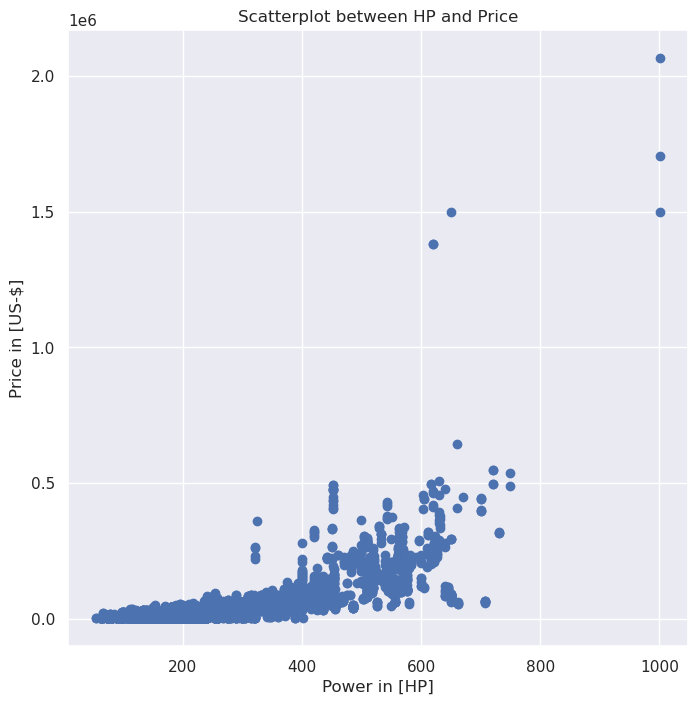

In [196]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(car_df['HP'], car_df['Price'])
plt.title('Scatterplot between HP and Price')
ax.set_xlabel('Power in [HP]')
ax.set_ylabel('Price in [US-$]')
plt.show()

In this representation we can see the outliers very well: there are three cars with around 1000 PS, and two cars with a price of over 1 Mio USD. 

We will make a second plot to only look at cars that cost less than 1 Mio USD. 

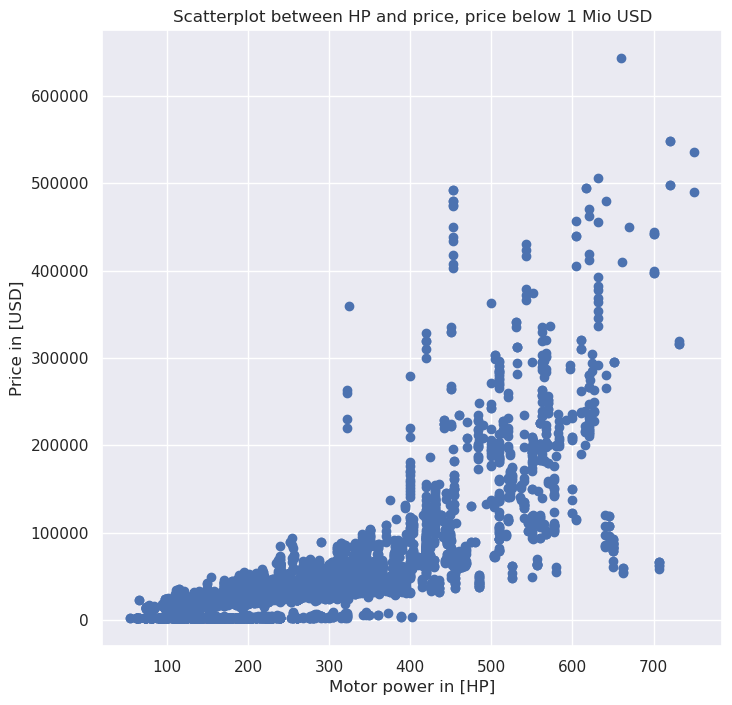

In [197]:
cars_u1M = car_df[ car_df['Price']<1000000 ]
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(cars_u1M['HP'], cars_u1M['Price'])
plt.title('Scatterplot between HP and price, price below 1 Mio USD')
ax.set_xlabel('Motor power in [HP]')
ax.set_ylabel('Price in [USD]')
plt.show()

We want another plot with all cars that cost less than 50\'000 USD.

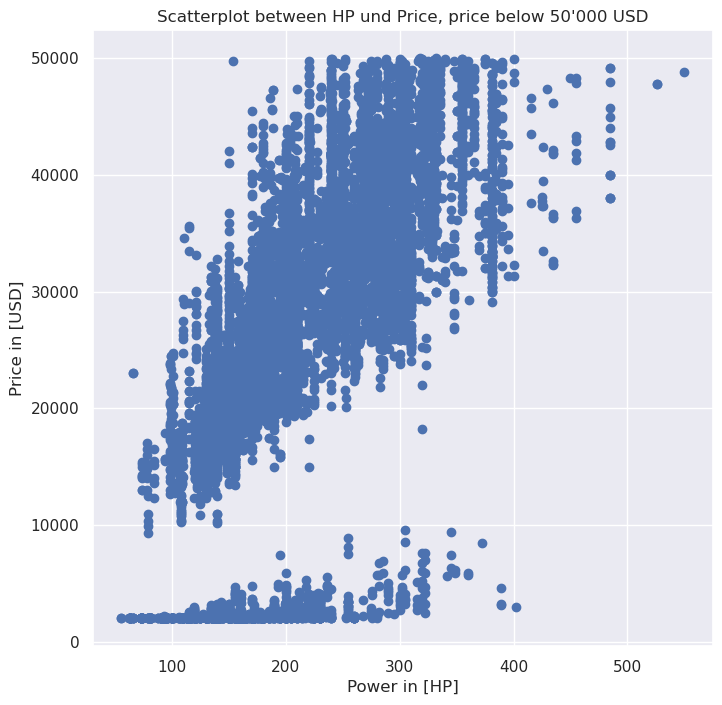

In [198]:
cars_u50k = car_df[ car_df['Price']<50000 ]
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(cars_u50k['HP'], cars_u50k['Price'])
plt.title('Scatterplot between HP und Price, price below 50\'000 USD')
ax.set_xlabel('Power in [HP]')
ax.set_ylabel('Price in [USD]')
plt.show()

We can see that for cars with a price above 10\'000 USD, the price increases with increasing horse power. That corresponds to the observation we got in the correlation matrix - for the relationship between `HP`, and `Price` the computed correlation was at 0.66. 

Therefore, we can formulate the following **hypothesis**: For cars with a price between 10\'000 USD and 50\'000 USD, there is a linear dependency between the price and the motorpower in HP. 

**Exercises**: 
* What further relationships can we see in the data? Play around with the plots and make scatterplots for different combinations of car attributes. You can for instance be inspired by the correlation matrix. But, even if the correlation is 0, can you find some explanation in part of the data? 
Identify at least two further hypotheses for a correlation.
* Looking at the plots above (and possibly other ones you have generated), where do you assume relevant differences in the underlying structure of the data?

## Regression
We will now implement regression models, following the same approach we used in the previous notebooks. 

### Auxiliary Functions
We first define 3 auxiliary functions which take over functionality we will use repeadedly to compare different models:

* apply_eval_model: applies a model to a given dataset and evaluates the performance
* train_apply_eval_model: trains a **scikit-learn model** (e.g., linear regression, etc.) on a given dataset, and evaluates the performance on the training and test set
* train_apply_eval_NN_model: trains a **neural network model implemented in tensorflow** on a given dataset, and evaluates the performance on the training and test set
You do not need to understand these functions in detail, but make sure to use the appropriate function, as you might get errors otherwise.

In [199]:
def apply_eval_model(model, X, y_true, model_name, do_print=True):
    """
    Function to evaluate a given model on a feature data frame and compute several performance metrics.
    The results are returned as a data frame and optionally printed out.

    Arguments:
    model - the model to be evaluated
    X - a data frame containing the predictors
    y_true - the true target values, used for the performance assessment
    model_name - name of the model (will be added to the result data frame)
    do_print - optional argument to indicate whether the results should be printed
    """
    y_pred = model.predict(X)
    if do_print:
        print('r2-Score: ' + str(r2_score(y_true, y_pred)))
        print('MSE: ' + str(mean_squared_error(y_true, y_pred)))
        print('RMSE: ' + str(root_mean_squared_error(y_true, y_pred)))

    if len(model_name)>0:
        df = pd.DataFrame({'model_name': model_name,
                           'r2_score': r2_score(y_true, y_pred),
                           'MSE': mean_squared_error(y_true, y_pred),
                           'MAE': mean_absolute_error(y_true, y_pred),
                           'RMS': root_mean_squared_error(y_true, y_pred)},
                           index=[model_name])
        return df

In [200]:
def train_apply_eval_model(model, X_train, y_train, X_val, y_val, model_name='model', num_epochs=20, batch_size=16, do_print=True):
    """
    Train a given scikit-learn model on a training data set, and evaluate it on both the training and validation data.

    Arguments:
    model - the model to be evaluated
    X_train - the training predictors
    y_train - the true labels of the training data set
    X_val - the predictors of the validation data set
    y_val - the true labels of the validation data set
    model_name - name of the model (will be added to the result data frame)
    do_print - optional argument to indicate whether the results should be printed
    """

    n_val = X_val.shape[0]

    # Fit the model
    model.fit(X_train, y_train)

    if do_print:
        print('Evaluation on Training Data:')
    res_train = apply_eval_model(model, X_train, y_train, model_name, do_print=do_print)
    res_train['dataset'] = 'train'

    if n_val>0:
        if do_print:
            print('\nEvaluation on Validation Data:')
        res_val = apply_eval_model(model, X_val, y_val, model_name, do_print=do_print)
        res_val['dataset'] = 'validation'

        return pd.concat([res_train, res_val])
    else:
        return res_train

In [201]:
def train_apply_eval_NN_model(model, X_train, y_train, X_val, y_val, model_name='model', num_epochs=20, batch_size=16, do_print=True):
    """
    Train a given neural network model on a training data set, and evaluate it on both the training and validation data.

    Arguments:
    model - the model to be evaluated
    X_train - the training predictors
    y_train - the true labels of the training data set
    X_val - the predictors of the validation data set
    y_val - the true labels of the validation data set
    model_name - name of the model (will be added to the result data frame)
    do_print - optional argument to indicate whether the results should be printed
    """

    n_val = X_val.shape[0]

    learning_rate = 0.001
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error',
        metrics=['mean_squared_error', 'r2_score']
    )
    
    # Fit the model
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=num_epochs,
        batch_size=batch_size,
        verbose=0
    )

    if do_print:
        print('Evaluation on Training Data:')
    res_train = apply_eval_model(model, X_train, y_train, model_name, do_print=do_print)
    res_train['dataset'] = 'train'

    if n_val>0:
        if do_print:
            print('\nEvaluation on Validation Data:')
        res_val = apply_eval_model(model, X_val, y_val, model_name, do_print=do_print)
        res_val['dataset'] = 'validation'

        return history, pd.concat([res_train, res_val])
    else:
        return history, res_train

### Separating Sports Cars and Regular Cars
Based on our earlier analysis, we noticed that the correlation between car prices and other attributes differs between sports cars and regular cars. To test if separating the data improves accuracy, we’ll split the dataset into two groups and train models for each separately. We’ll use horsepower (HP) as the defining factor, categorizing cars with more than 400 HP as sports cars and the rest as regular cars. We will then use 3 different models to predict the price from the horsepowers.

For clarity, we use the following naming convention:
* `_all` is used to denote datasets that contain all cars. For example, `X_all`, `X_all_train`, etc. `X_all_test` are the features for the setting where we have one model for all cars.
* `_reg` is used to denote "regular" cars, i.e., cars with less than 400 HP.
* `_sport` is used to denote sport cars.

Furthermore, to avoid overfitting, we will not use the `Brand` and `Model` information, i.e., for this part, we only consider columns that do not contain `Brand` or `Model` in the name. This is what `cols_2use` is ensuring.

In [202]:
cols_2use = [c for c in all_dummies.columns if (('Brand' not in c) and ('Model' not in c))]

cols_2use

['Year',
 'HP',
 'Cylinder',
 'Doors',
 'highway MPG',
 'city mpg',
 'Price',
 'consumption_city',
 'F_type_diesel',
 'F_type_electric',
 'F_type_flex-fuel (premium unleaded recommended/E85)',
 'F_type_flex-fuel (premium unleaded required/E85)',
 'F_type_flex-fuel (unleaded/E85)',
 'F_type_flex-fuel (unleaded/natural gas)',
 'F_type_natural gas',
 'F_type_premium unleaded (recommended)',
 'F_type_premium unleaded (required)',
 'F_type_regular unleaded',
 'T_type_AUTOMATED_MANUAL',
 'T_type_AUTOMATIC',
 'T_type_DIRECT_DRIVE',
 'T_type_MANUAL',
 'T_type_UNKNOWN',
 'Wheels_all wheel drive',
 'Wheels_four wheel drive',
 'Wheels_front wheel drive',
 'Wheels_rear wheel drive']

In [209]:
# all cars:
numeric_df = all_dummies[cols_2use].dropna()
#numeric_df
y_all = numeric_df['Price']
X_all = numeric_df.drop(['Price'], axis=1)

# Now we split the data into training and validation sets
X_all_train, X_all_val, y_all_train, y_all_val = train_test_split(X_all, y_all, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_all_train_scaled = scaler.fit_transform(X_all_train)
X_all_val_scaled = scaler.transform(X_all_val)

y_all_train = np.array(y_all_train)
y_all_val = np.array(y_all_val)

In [210]:
# 'regular' cars with less than 400 HP
numeric_df = all_dummies[cols_2use].dropna()
regularCars = numeric_df[numeric_df['HP'] < 400]

# let's define a model for the regular cars: 
y_regular = regularCars['Price']
X_regular = regularCars.drop(['Price'], axis=1)

X_reg_train, X_reg_val, y_reg_train, y_reg_val = train_test_split(X_regular, y_regular, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_reg_train_scaled = scaler.fit_transform(X_reg_train)
X_reg_val_scaled = scaler.transform(X_reg_val)

y_reg_train = np.array(y_reg_train)
y_reg_val = np.array(y_reg_val)

**Exercise**: Define the corresponding datasets for sport cars.

### Defining, Training and Evaluating the Model: Linear Regression
We want to predict the price of a car, given the other features. 
We are using the data with dummy features we generated previously, as it contains all important features in a numerical form. 

In [211]:
# all cars:
model_lr_all = LinearRegression()

model_lr_all_result = train_apply_eval_model(model_lr_all, X_all_train_scaled
                                             
                                             , y_all_train, X_all_val_scaled, y_all_val,
                                             model_name='lin.reg., all cars')
model_lr_all_result

Evaluation on Training Data:
r2-Score: 0.525859965278407
MSE: 1836671651.0041552
RMSE: 42856.40735064192

Evaluation on Validation Data:
r2-Score: -2.906998232671262e+23
MSE: 1.0639181492638055e+33
RMSE: 3.2617758188811896e+16


,model_name,r2_score,MSE,MAE,RMS,dataset
"lin.reg., all cars","lin.reg., all cars",5.258600e-01,1.836672e+09,1.955527e+04,4.285641e+04,train
"lin.reg., all cars","lin.reg., all cars",-2.906998e+23,1.063918e+33,9.834624e+14,3.261776e+16,validation


**Exercise:** Train and evaluate two separate models for the regular and the sports cars. 

In [206]:
# regular cars:
# model_lr_reg = ...

# model_lr_reg_result = ...
# model_lr_reg_result

In [207]:
# sport cars:
# model_lr_sport = ...

# model_lr_sport_result =
# model_lr_sport_result

Now we can compare the performance of the individual results:

In [208]:
# Join all results:
results_lr = pd.concat([model_lr_all_result, model_lr_reg_result, model_lr_sport_result])

# Plotting the results
metrics =['r2_score', 'RMS']

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

for i, metric in enumerate(metrics):
    sns.barplot(data=results_lr, y='model_name', x=metric, hue='dataset', ax=axs[i])
    axs[i].legend()
    axs[i].grid()

plt.tight_layout()
plt.show()

NameError: name 'model_lr_reg_result' is not defined

**Exercise:** Interpret the results. What benefit can we draw from splitting the cars into regular and sport cars?

**Exercise:** Can you spot any further outliers in the set of regular cars? Make sure that you follow a principled approach and don't just get rid of examples (i.e., cars) that your model fails to accurately predict!

**Optional Exercise:** Modify the code above to filter out these further outliers, and run the model comparison again. How does the performance evolve?

**Optinal Exercise:** Re-run the above comparison using a neural network regression model. Use the functions provided above to fit and evaluate the models. Follow the same structure and plot the results at the end. Comment on your findings - in particular, do the findings we have obtained for linear regression also hold for a neural network model?

***Hint:*** You can use `model2 = tf.keras.models.clone_model(model1)` to get a copy of `model1` and save it as `model2`. The new model `model2` will have the exact same structure (i.e., same type, width and number of layers), but can be trained separately based on a different dataset.